In [1]:
# 주요 라이브로리 import

import pandas as pd
import numpy as np
import sklearn
import scipy
import statsmodels
import mlxtend
import sys
import imblearn

print(sys.version)
for i in [pd, np, sklearn, scipy, mlxtend, statsmodels, imblearn]:
    print(i.__name__, i.__version__)

3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 20:34:20) [MSC v.1916 64 bit (AMD64)]
pandas 0.25.1
numpy 1.18.5
sklearn 0.21.3
scipy 1.5.2
mlxtend 0.15.0.0
statsmodels 0.11.1
imblearn 0.5.0


In [2]:
# 시각화 라이브러리 Import
import matplotlib.pyplot as plt
import seaborn as sns

실제 문제가 위치한 git 링크입니다. 여기에서 문제와 데이터셋을 다운로드 받으세요~

[DS_Prob1](https://github.com/sunkusun9/DS_prob1)

# 문제 개요

유명 도서 전자상거래 회사에서 근무하는 Junior Data Scientist 지희는

도서 전자상거래 사이트에는 사용자가 읽을 책(to read)이라고 책에 표시하는 기능이 있습니다.

사용자가 읽을 책(to read)에 남긴 내역은 그렇게 많지는 않지만,

사용자의 선호도를 직접 나타낸 것이라는 점에서 순도는 높은 데이터라고 판단됩니다.

사용자의 to read에 담길 만한 도서를 예측하여,

사용자에게 도서를 추천하는 시스템을 구상하고 있습니다.

지희가 도서 추천 프로젝트를 성공적으로 이끌기 위한 미션을 해봅니다.

## 데이터셋 구성 요약

<div style="display: flex; flex-wrap: wrap; gap: 50px;">

<!-- books.csv -->
<div style="flex: 1; min-width: 300px;">

- **books.csv**

  도서 정보

| 변수명 | 설명 | 타입 |
|:--|:--|:--|
| `book_id` | 도서 번호 | 정수형 |
| `authors` | 저자 | 문자형 |
| `original_title` | 도서 원제목 | 문자형 |
| `pub_year` | 출간연도 | 실수형 |
| `genre` | 장르 | 문자형 |
| `children` | 유아용 도서 여부 | 문자형 |

</div>

<!-- ratings.csv -->
<div style="flex: 1; min-width: 250px;">

- **ratings.csv**

  사용자 평점 데이터

| 변수명 | 설명 | 타입 |
|:--|:--|:--|
| `user_id` | 사용자 ID | 정수형 |
| `book_id` | 도서 번호 | 정수형 |
| `rating` | 평점 | 정수형 |

</div>

</div>

---

<div style="display: flex; flex-wrap: wrap; gap: 20px;">

<!-- to_read_sample.csv -->
<div style="flex: 1; min-width: 300px;">

- **to_read_sample.csv**

  사용자별 ‘읽을 책’ 목록 샘플

| 변수명 | 설명 | 타입 |
|:--|:--|:--|
| `user_id` | 고객 번호 | 정수형 |
| `to_read` | 읽을 책 리스트<br/>(\|으로 구분) | 문자열 |

</div>

<!-- to_read_kaggle.csv -->
<div style="flex: 1; min-width: 300px;">

- **to_read_kaggle.csv**

  예측 대상 사용자 목록

| 변수명 | 설명 | 타입 |
|:--|:--|:--|
| `user_id` | 고객 번호 | 정수형 |

</div>

<!-- to_read_ans.csv -->
<div style="flex: 1; min-width: 300px;">

- **to_read_ans.csv**

  정답 데이터

| 변수명 | 설명 | 타입 |
|:--|:--|:--|
| `user_id` | 사용자 ID | 정수형 |
| `to_read` | 읽을 책 리스트<br/>(\|으로 구분) | 문자열 |

</div>

</div>

#  데이터 전처리

지희는 **‘읽을 책(to read)’** 목록이 사용자의 선호도를 직접적으로 반영하지만 데이터의 양이 많지 않기 때문에, 

사용자 성향을 더 잘 파악하기 위해 **도서 평점 정보**를 함께 활용하기로 했습니다.  

이에 따라 연구소에 사용자의 선호도를 추출할 방법을 문의한 결과, 다음과 같은 가이드를 받았습니다.

---

도서 평점 데이터에 내재된 사용자와 도서의 특징을 **n차원 실수 벡터**로 추출하여 벡터 간의 관계를 분석할 수 있습니다.

임베딩은 높은 복잡도를 지닌 변수, 여기서는 고차원의 범주형 변수인 user_id, book_id와 같은 변수를

나타내는 저차원의 연속형 벡터를 의미합니다.

**ratings**에서 **사용자별 임베딩(user embedding)** 과 **도서별 임베딩(book embedding)** 을 추출하는 방법을 알려 드립니다.

---

**사용자 임베딩 (User embedding)**

각 사용자에 대한 내재 벡터를 모으면,  
전체 사용자를 행으로 하는 **(사용자 수 × n)** 차원의 행렬로 표현할 수 있습니다.  

<div style="text-align:left; display:inline-block; width:auto; padding-left:20px;">
    
| user_id | $u_0$ | $u_1$ | $u_2$ | ... | $u_n$ |
|:--|:--|:--|:--|:--|:--|
| 1 | 0.251 | 0.10 | 0.03 | ... | 0.15 |
| 4 | 0.080 | 0.15 | 0.01 | ... | 0.80 |
| ... | ... | ... | ... | ... | ... |
| 53394 | 0.010 | 0.81 | 0.12 | ... | 0.92 |

</div>

※ 위 수치는 예시이며 실제 값과는 무관합니다.  

💡Hint: `user_id`를 인덱스로 한 `pd.DataFrame` 구조를 권장합니다.

---

**도서 임베딩 (Book embedding)**

각 도서의 특성을 실수 벡터로 추출하면,  
전체 도서를 행으로 하는 **(도서 수 × n)** 차원의 행렬로 표현할 수 있습니다.  

<div style="text-align:left; display:inline-block; width:auto; padding-left:20px;">

| book_id | $b_0$ | $b_1$ | $b_2$ | ... | $b_n$ |
|:--|:--|:--|:--|:--|:--|
| 1 | 0.10 | 0.128 | 0.50 | ... | 0.10 |
| 2 | 0.07 | 0.180 | 0.25 | ... | 0.02 |
| ... | ... | ... | ... | ... | ... |
| 2355 | 0.08 | 0.110 | 0.02 | ... | 0.05 |

</div>

※ 위 수치는 예시이며 실제 값과는 무관합니다.  

💡Hint: `book_id`를 인덱스로 한 `pd.DataFrame` 구조를 권장합니다.

---

**내재 속성 추출 방법**

연구소에서는 **L2 규제(규제 계수 λ)** 가 포함된 회귀모델을 사용하여  
사용자와 도서의 내재된 속성을 추출하는 방법을 제안했습니다.  

이때, 회귀계수는 다음 **정규화된 OLS(Ordinary Least Squares)** 공식을 따릅니다:


$\hat{\beta} = (X^T X + \lambda I)^{-1} X^T y$

- $X$: 입력 디자인 행렬  
- $y$: 대상 변수 (rating 등)  
- $I$: $( n \times n )$ 단위 행렬 (주대각 원소는 1, 나머지는 0)

---

연구소의 검증 결과,  
이 데이터셋에서는 **차원 수 \( n = 10 \)**, **규제 계수 \( $\lambda = 15$ \)** 를 사용했을 때  
시각화를 통해 도서의 성질을 잘 반영하는 결과를 얻었다고 합니다.  

구체적인 수치 지표는 제시되지 않았지만,  
이 설정을 기반으로 내재 속성 추출을 진행합니다.



추출 과정은 아래의 **Step A-1 ~ A-5** 에서 자세히 설명합니다.

## Step A-1

ratings.csv를 불러옵니다. (데이터셋 명: **ratings**)

In [3]:
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()

,user_id,book_id,rating
0,5115,409,5
1,41322,41,5
2,13438,596,3
3,39116,60,3
4,8014,23,4


## Step A-2

**user_coef**와 **book_coef**를 다음 초기화 루틴에 따라 초기화합니다.

**Step A-1**에서 불러온 **ratings**의 변수명을 df_ratings로 했을 때, 기준으로 만든 가이드 입니다. 

Python:  user_coef, book_coef 초기화 루틴
```python
np.random.seed(123)
n = 10
df_user_coef = pd.DataFrame(
    np.random.random(size=(df_ratings['user_id'].nunique(), n)) * 1 / (n ** 0.5), 
    index=df_ratings['user_id'].unique(),
    columns=['u{}'.format(i) for i in range(n)]
)
df_book_coef = pd.DataFrame(
    np.random.random(size=(df_ratings['book_id'].nunique(), n)) * 1 / (n ** 0.5), 
    index=df_ratings['book_id'].unique(),
    columns=['b{}'.format(i) for i in range(n)]
)
```


In [4]:
np.random.seed(123)
n = 10
df_user_coef = pd.DataFrame(
    np.random.random(size=(df_ratings['user_id'].nunique(), n)) * 1 / (n ** 0.5), 
    index=df_ratings['user_id'].unique(),
    columns=['u{}'.format(i) for i in range(n)]
)
df_book_coef = pd.DataFrame(
    np.random.random(size=(df_ratings['book_id'].nunique(), n)) * 1 / (n ** 0.5), 
    index=df_ratings['book_id'].unique(),
    columns=['b{}'.format(i) for i in range(n)]
)

## Step A-3

**ratings**에 드러난 사용자의 특성을 추출하여 user_coef를 재구성하는 방법입니다.

**ratings**에서 user_id별로 **book_coef**에서 book_id의 벡터를 가져와서 입력변수를 구성하고, 

rating 변수를 대상 변수로 하여 Ridge 회귀모델의 회귀 계수를 구합니다. 

user_id별로 구한 계수를 $u_0$ ~ $u_9$ 순서대로 변수를 만들고 user_id를 인덱스하는

**user_coef**와 동일한 형태의 데이터프레임으로 재구성하여 **user_coef_next**를 만듭니다.

이 때 연구소의 제안대로 규제계수 lambda를 15로 설정합니다.

예를 들어, user_id가 1인 **ratings**가 아래와 같다면,

<div style="text-align:left; display:inline-block; width:auto; padding-left:20px;">

|book_id|rating|
|-------|------|
|1|5|
|5|4|
|3|3|
|...|...|
|21|4|

</div>

Ridge 회귀모델을 구하기 위한 디자인 행렬은

<div style="text-align:left; display:inline-block; width:auto; padding-left:20px;">

|$b_0$|$b_1$|$b_2$|...|$b_9$|rating|
|-----|-----|-----|---|-----|------|
|b(1,0)|b(1,1)|b(1,2)|...|b(1,9)|5|
|b(5,0)|b(5,1)|b(5,2)|...|b(5,9)|4|
|b(3,0)|b(3,1)|b(3,2)|...|b(3,9)|3|
|...|...|...|...|...|...|
|b(21,0)|b(21,1)|b(21,2)|...|b(21,9)|4|

</div>

가 됩니다. ※ b(i, j): **book_coef**에서 book_id=i의 j번째 요소입니다.


**Ridge 회귀를 위한 정규방정식**은 아래와 같습니다.

<div style="text-align:left; display:inline-block; width:auto; padding-left:20px;">

$\hat{\beta}=(X^TX + \lambda I)^{-1}X^Ty$, 

  $X$는 입력 디자인행렬, 
 
  $y$는 대상변수입니다. 
 
  $I$는 n×n의 단위행렬(주대각 원소는 1이고 나머지는 0인 행렬)

</div>




**Python 함수 가이드**
```
numpy.dot
numpy.eye
numpy.linalg.inv 활용 권장
```

💡Hint:

<div style="text-align:left; display:inline-block; width:auto; padding-left:20px;">
    
$Δu^2=\sum_{i∈users}\sum_{j=0}^{9}\bigl(u(i,j)-u2(i,j)\bigr)^2$

</div>

※ u(i, j): user_coef에서 user_id=i의 j번째 요소

※ u2(i, j): user_coef_next에서 user_id=i의 j번째 요소

첫 번째 실행 때의 $Δu^2$는 52371.541 (넷째 자리에서 반올림해서 셋째 자리까지 표기) 입니다.


In [16]:
lambI = np.eye(n) * 15
def ridge(X, y):
    return np.dot(
        np.linalg.inv(np.dot(X.T, X) + lambI),
        np.dot(X.T, y)
    )

In [19]:
df_user_coef_next = df_ratings.groupby('user_id').apply(
    lambda x: pd.Series(ridge(df_book_coef.loc[x['book_id']], x['rating']), index = df_user_coef.columns)
)
df_user_coef_next.head()

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9
user_id,,,,,,,,,,
1,1.102082,1.085987,1.111042,1.105670,1.004479,0.918447,0.955763,0.975000,0.975634,1.033043
4,1.276249,1.120128,1.293845,1.186997,1.195779,1.183349,1.242264,1.159640,1.230613,1.334106
9,0.851812,1.071020,1.100843,1.299525,0.957480,1.124742,1.030114,1.043045,1.146473,1.011855
24,0.852114,0.814326,0.931409,0.995677,0.998848,0.942323,1.040961,0.962426,0.930897,1.019645
35,1.043160,1.163733,1.174084,1.001414,1.111310,1.095792,1.212668,1.168254,1.220382,1.038751
...,...,...,...,...,...,...,...,...,...,...
53303,1.321594,1.279849,1.155187,1.071154,1.195128,1.208633,1.135421,1.356713,1.374061,1.269208
53317,1.614871,1.369778,1.376785,1.401436,1.263530,1.457292,1.213453,1.469136,1.443588,1.500762
53327,1.367048,1.115316,1.336326,1.101150,1.170908,1.070677,1.255218,0.993175,1.273362,1.253613


In [21]:
((df_user_coef_next - df_user_coef) ** 2).sum().sum()

52371.54119416874

## Step A-4

**ratings**에 드러난 도서의 특성을 추출하여 book_coef를 재구성하는 방법입니다.

**ratings**에서 book_id별로 **user_coef_next**에서 user_id의 벡터를 가져와서 입력변수를 구성하고, 

rating 변수를 대상 변수로 하여 Ridge 회귀모델의 회귀 계수를 구합니다. 

book_id별로 구한 계수를 $b_0$ ~ $b_9$ 순서대로 변수를 만들고 book_id를 인덱스하는

**book_coef**와 동일한 형태의 데이터프레임으로 재구성하여 **book_coef_next**를 만듭니다.

이 때 연구소의 제안대로 규제계수 lambda를 15로 설정합니다.

예를 들어, book_id가 2인 **ratings**가 아래와 같다면,

<div style="text-align:left; display:inline-block; width:auto; padding-left:20px;">

|user_id|rating|
|-------|------|
|2|5|
|7|4|
|5|3|
|...|...|
|82|4|

</div>

Ridge 회귀모델을 구하기 위한 디자인 행렬은

<div style="text-align:left; display:inline-block; width:auto; padding-left:20px;">

|$u_0$|$u_1$|$u_2$|...|$u_9$|rating|
|-----|-----|-----|---|-----|------|
|u2(2,0)|u2(2,1)|u2(2,2)|...|u2(2,9)|5|
|u2(7,0)|u2(7,1)|u2(7,2)|...|u2(7,9)|4|
|u2(5,0)|u2(5,1)|u2(5,2)|...|u2(5,9)|3|
|...|...|...|...|...|...|
|u2(82,0)|u2(82,1)|u2(82,2)|...|u2(82,9)|4|

</div>

가 됩니다. ※ b(i, j): **book_coef**에서 book_id=i의 j번째 요소입니다.


**Ridge 회귀를 위한 정규방정식**은 아래와 같습니다.

<div style="text-align:left; display:inline-block; width:auto; padding-left:20px;">

$\hat{\beta}=(X^TX + \lambda I)^{-1}X^Ty$, 

  $X$는 입력 디자인행렬, 
 
  $y$는 대상변수입니다. 
 
  $I$는 n×n의 단위행렬(주대각 원소는 1이고 나머지는 0인 행렬)

</div>




**Python 함수 가이드**
```
numpy.dot
numpy.eye
numpy.linalg.inv 활용 권장
```

💡Hint:

<div style="text-align:left; display:inline-block; width:auto; padding-left:20px;">

$Δb^2=\sum_{i∈books}{\sum_{j=0}^{j=9}[(b(i,j) - b2(i, j)]^2}$

</div>

※ b(i, j): book_coef에서 book_id=i의 j번째 요소입니다.

※ b2(i, j): book_coef_next에서 book_id=i의 j번째 요소입니다

첫 번째 실행 후의 $Δb^2$는 319.447 (넷째자리 반올림해서 셋째 자리 구함)입니다. 


In [23]:
df_book_coef_next = df_ratings.groupby('book_id').apply(
    lambda x: pd.Series(ridge(df_user_coef_next.loc[x['user_id']], x['rating']), index = df_book_coef.columns)
)
((df_book_coef_next - df_book_coef) ** 2).sum().sum()

319.4473777325812

## Step A-5

```
user_coef = user_coef_next
book_coef = book_coef_next
```

으로 설정합니다.

**Step A-3~5**를 **모두 7번을 반복**합니다. 

마지막 실행시, 

$Δu^2$는 84.802, $Δb^2$는 15.578 (넷째 자리에서 반올림해서 셋째 자리까지 구함) 

입니다.


최종 user_coef와 book_coef를 각각 데이터프레임 **user_coef**, **book_coef** 이라고 합니다.

In [24]:
np.random.seed(123)
n = 10
df_user_coef = pd.DataFrame(
    np.random.random(size=(df_ratings['user_id'].nunique(), n)) * 1 / (n ** 0.5), 
    index=df_ratings['user_id'].unique(),
    columns=['u{}'.format(i) for i in range(n)]
)
df_book_coef = pd.DataFrame(
    np.random.random(size=(df_ratings['book_id'].nunique(), n)) * 1 / (n ** 0.5), 
    index=df_ratings['book_id'].unique(),
    columns=['b{}'.format(i) for i in range(n)]
)

lambI = np.eye(n) * 15 
def ridge(X, y):
    return np.dot(
        np.linalg.inv(np.dot(X.T, X) + lambI), 
        np.dot(X.T, y)
    )

for epoch in range(7):
    df_user_coef_next = df_ratings.groupby('user_id').apply(
        lambda x: pd.Series(ridge(df_book_coef.loc[x['book_id']], x['rating']), index = df_user_coef.columns)
    )


    df_book_coef_next = df_ratings.groupby('book_id').apply(
        lambda x: pd.Series(ridge(df_user_coef_next.loc[x['user_id']], x['rating']), index = df_book_coef.columns)
    )
    print(
        epoch + 1, 
        ((df_user_coef - df_user_coef_next) ** 2).sum().sum(), ((df_book_coef - df_book_coef_next) ** 2).sum().sum()
    )
    df_user_coef = df_user_coef_next
    df_book_coef = df_book_coef_next

1 52371.54119416874 319.4473777325812
2 3734.0253302929364 232.17238047754634
3 1179.4163988437867 82.07412244927218
4 449.8113390980229 43.54773778076639
5 230.16479542940286 28.417090265549458
6 134.14522064481017 20.456183148334816
7 84.80234424060035 15.577813361199464


**Step A-6**

books.csv를 불러옵니다.(데이터셋명: **books**)

In [25]:
df_books = pd.read_csv('books.csv', index_col = 'book_id')
df_books.head()

,authors,original_title,pub_year,genre,children
book_id,,,,,
1,Suzanne Collins,The Hunger Games,2008.0,Adventure,no
2,J.K. Rowling,Harry Potter and the Philosopher's Stone,1997.0,Fantasy,Yes
3,Stephenie Meyer,Twilight,2005.0,Romance,no
4,Harper Lee,To Kill a Mockingbird,1960.0,Mystery,no
5,F. Scott Fitzgerald,The Great Gatsby,1925.0,Romance,no


**Step A-7**

**books**의 children을 소문자로 변환합니다.

children이 yes이면 1 no이면 0인 정수형 변수로 만듭니다.

In [26]:
df_books['children'] = (df_books['children'].str.lower() == 'yes').astype('int') # Idempotent

## Step 1-6, Optional

**book_coef** 데이터프레임을 다음과 같은 형식으로 tab으로 분리된 출력 파일을 만듭니다.

**book_coef.tsv**
<div style="text-align:left; display:inline-block; width:auto; padding-left:20px; padding-bottom:20px">

|$b_0$|$b_1$|$b_2$|...|$b_9$|
|-----|-----|-----|---|----|
|b(1, 0)|b(1, 1)|b(1, 2)|...|b(1, 9)|
|b(2, 0)|b(2, 1)|b(2, 2)|...|b(2, 9)|
|...|...|...|...|...|
|b(2355, 0)|b(2355, 1)|b(2355, 2)|...|b(2355, 9)|
</div>

Python 함수 가이드
```
pd.DataFrame.to_csv
sep='\t', header=None, index=None

```

**books** 데이터프레임의 내용을 아래와 같은 내용으로 제구성하여, tab으로 분리된 출력 파일을 만듭니다.

**books.tsv**
<div style="text-align:left; display:inline-block; width:auto; padding-left:20px; padding-bottom:20px">

|authors|original_title|genre|pub_year|children|
|-------|--------------|-----|--------|--------|
|Suzanne Collins|The Hunger Games|2008.0|Adventure|0|
|J.K. Rowling|Harry Potter and the Philosopher's Stone|1997.0|Fantasy|1|
|...|...|...|...|...|
|George Eliot|Silas Marner: The Weaver of Raveloe|1861.0|Drama|0|
</div>

original_title에 결측치는 'Unknown'으로 바꾸어 저장합니다. (**books**의 내용은 바꾸지 않습니다.)

Python 함수 가이드
```
pd.DataFrame.to_csv
sep='\t', index=None

```


[Embedding Projector](https://projector.tensorflow.org/)에 접속합니다.

우측에 회색 바탕의 Load 버튼을 클릭하면 

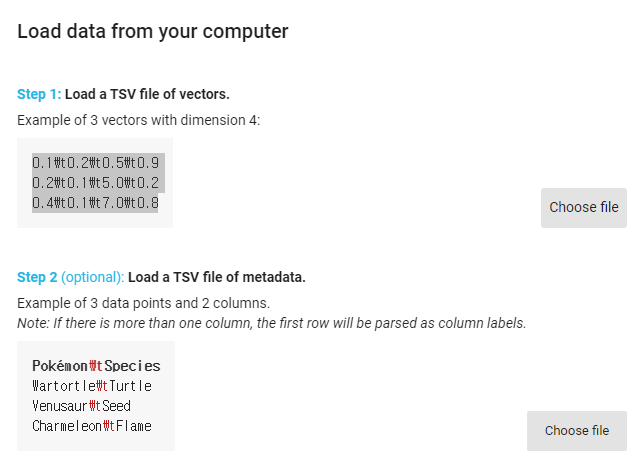

이미지가 뜨는데요, 

Step1에는 book_coef.tsv 

Step2에는 books.tsv

을 전달합니다.

In [27]:
df_book_coef.to_csv('book_coef.tsv', sep='\t', header=None, index=None)
df_books.assign(
    original_title = lambda x: x['original_title'].fillna('Unknown')
).to_csv('books.tsv', sep='\t', index=None)

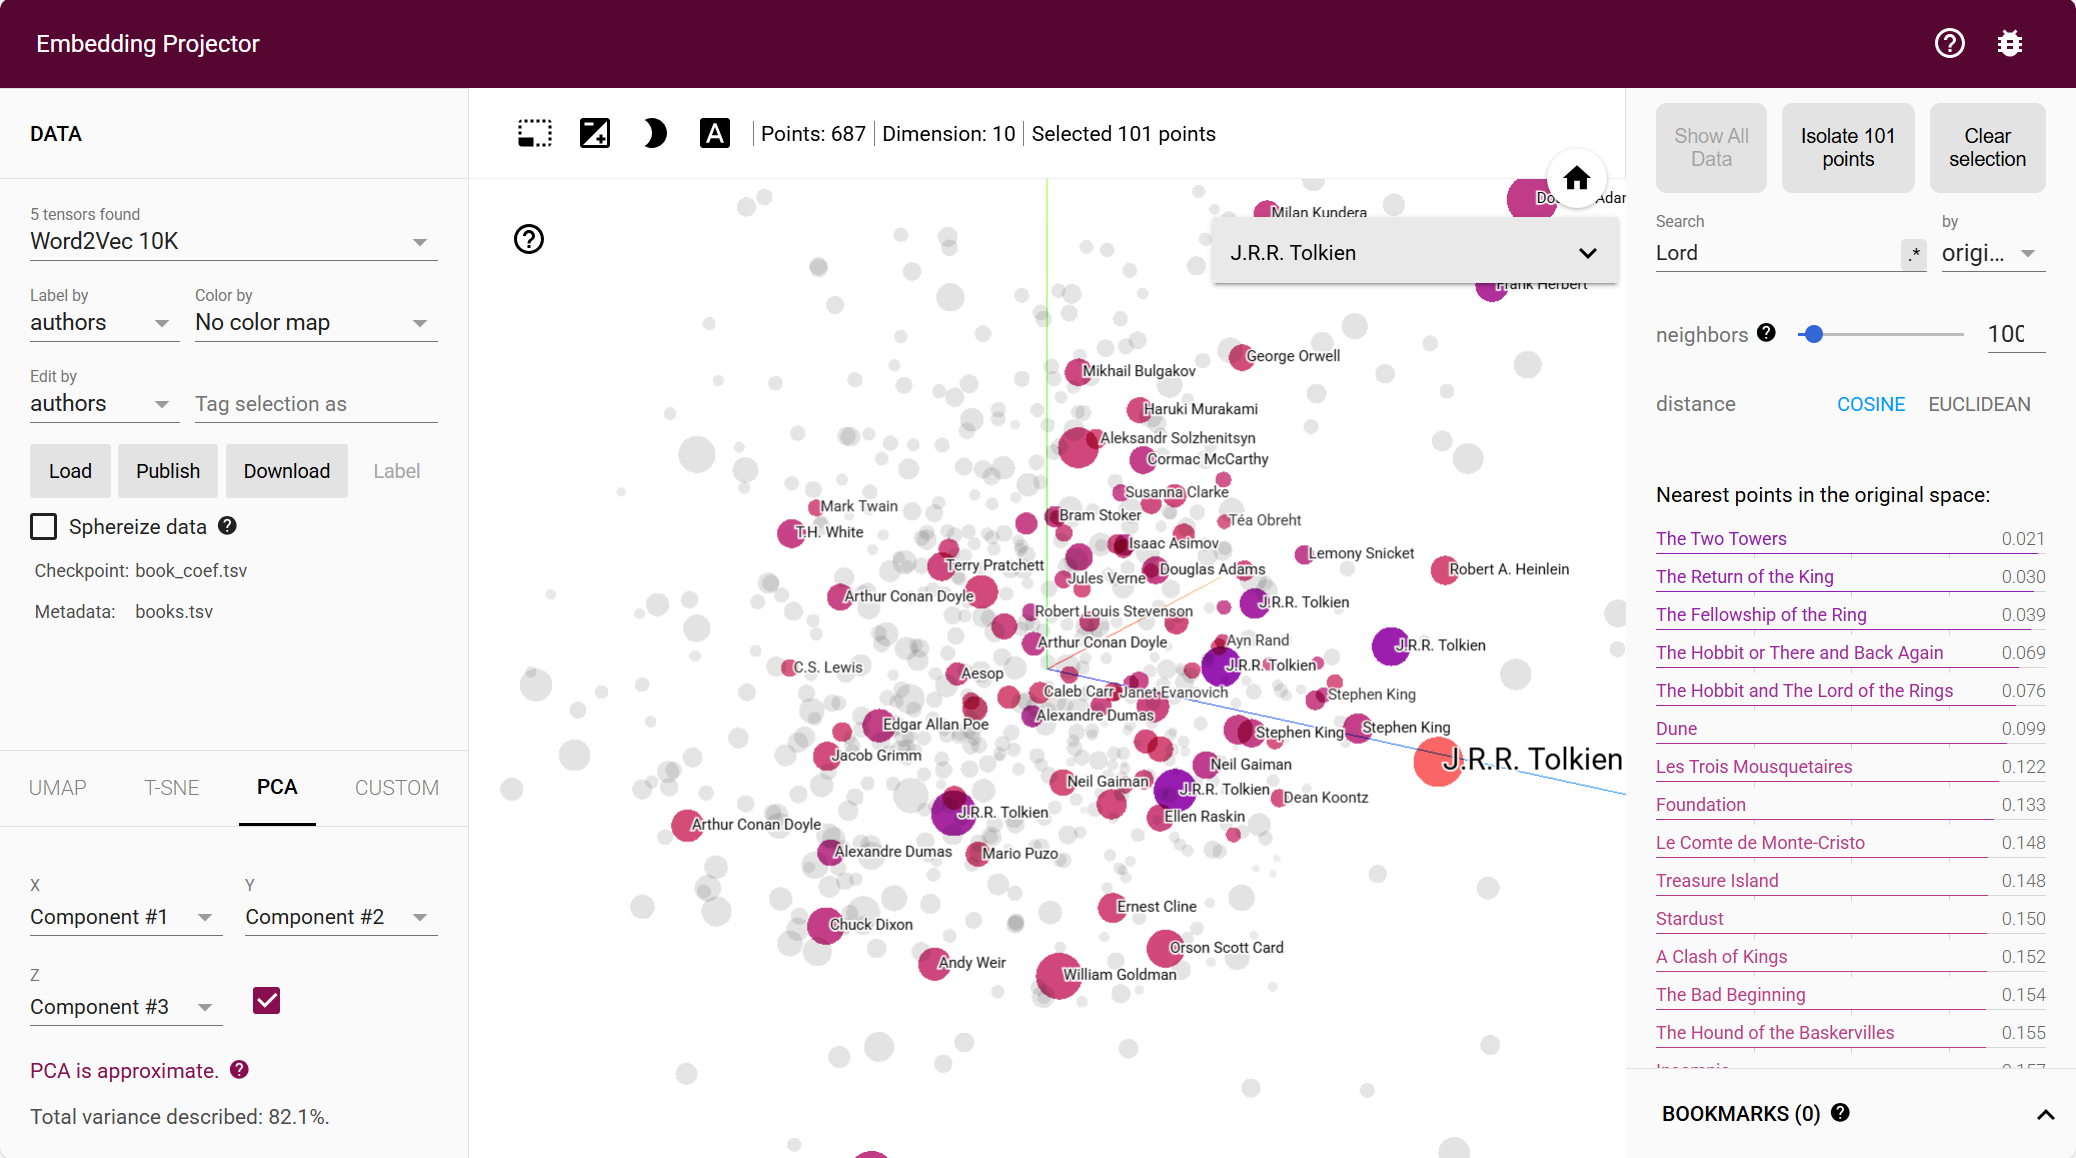

df_book_coef 상에서의 거리와, 관념속의 유사도와 매칭을 시키 book_coef 의미점을 도출해 보았습니다.

모든 문제의 솔루션은

**강사: 멀티캠퍼스 강선구(sunku0316.kang@multicampus.com, sun9sun9@gmail.com)**

연락주시면 드리겠습니다.

3 일간 하루 종일 고밀도의 강의를 들으시느라 고생많으셨습니다.

생성형 AI 좋은 도구 이지만, 100% 내 맘에 드는 답은 주지 못합니다.

일일이 물어 가면서 고쳐가면서 쓰는 게 오히려 힘든 경우 많이 만납니다.

[재밌는 영상 있어 유튜브 영상 걸어 둡니다.](https://www.youtube.com/watch?v=2dAcrGKiOBM&list=PLC4YPtlZPGDW-MOicI8poQxR5exBmuqci)

또한 배경 스킬과 지식이 없다면 좋은 결과물인지 아닌지도 알수 없겠죠,

아이디어를 만들어 내고 AI를 통해서 코드를 만들고 다듬고 확장하고 구조화하기 위해,

자신의 구현 스킬을 높여 가는 것은 아직도 유효하다고 봅니다.

DS Level3에 합격하기 위한 여러 가지 실기 중심으로, 조금 더 깊게 내용을 구성해보았습니다.

제가 했던 시행 착오라던지 깨닭음을 얻기 오래 걸렸던 것들까지 과정을 통해 챙겨가셔서,

Level3 취득과 Data Science의 즐거움 두 마리의 토끼를 잡으시길 바랍니다.

감사합니다.

\- 멀티캠퍼스 강선구 올림 -